In [9]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [10]:
TRAIN_DIR = 'dataset3/train'
TEST_DIR = 'dataset3/test'

In [11]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [12]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

Dileep(Student1) completed
Jayaram(Student2) completed
Mammotty(Student3) completed
Mohanlal(Student4) completed
Prithiraj(Student5) completed


In [13]:
print(train)

                                                  image                label
0     dataset3/train\Dileep(Student1)\resized_dileep...     Dileep(Student1)
1     dataset3/train\Dileep(Student1)\resized_dileep...     Dileep(Student1)
2     dataset3/train\Dileep(Student1)\resized_dileep...     Dileep(Student1)
3     dataset3/train\Dileep(Student1)\resized_dileep...     Dileep(Student1)
4     dataset3/train\Dileep(Student1)\resized_dileep...     Dileep(Student1)
...                                                 ...                  ...
1091  dataset3/train\Prithiraj(Student5)\Prithiviraj...  Prithiraj(Student5)
1092  dataset3/train\Prithiraj(Student5)\Prithiviraj...  Prithiraj(Student5)
1093  dataset3/train\Prithiraj(Student5)\Prithiviraj...  Prithiraj(Student5)
1094  dataset3/train\Prithiraj(Student5)\Prithiviraj...  Prithiraj(Student5)
1095  dataset3/train\Prithiraj(Student5)\Prithiviraj...  Prithiraj(Student5)

[1096 rows x 2 columns]


In [14]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

Dileep(Student1) completed
Jayaram(Student2) completed
Mammotty(Student3) completed
Mohanlal(Student4) completed
Prithiraj(Student5) completed


In [15]:
print(test)
print(test['image'])

                                                 image                label
0    dataset3/test\Dileep(Student1)\Dileep Test 1 (...     Dileep(Student1)
1    dataset3/test\Dileep(Student1)\Dileep Test 1 (...     Dileep(Student1)
2    dataset3/test\Dileep(Student1)\Dileep Test 1 (...     Dileep(Student1)
3    dataset3/test\Dileep(Student1)\Dileep Test 1 (...     Dileep(Student1)
4    dataset3/test\Dileep(Student1)\Dileep Test 1 (...     Dileep(Student1)
..                                                 ...                  ...
323  dataset3/test\Prithiraj(Student5)\Prithviraj  ...  Prithiraj(Student5)
324  dataset3/test\Prithiraj(Student5)\Prithviraj  ...  Prithiraj(Student5)
325  dataset3/test\Prithiraj(Student5)\Prithviraj  ...  Prithiraj(Student5)
326  dataset3/test\Prithiraj(Student5)\Prithviraj  ...  Prithiraj(Student5)
327  dataset3/test\Prithiraj(Student5)\Prithviraj  ...  Prithiraj(Student5)

[328 rows x 2 columns]
0      dataset3/test\Dileep(Student1)\Dileep Test 1 (...
1      

In [16]:
from tqdm.notebook import tqdm

In [17]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [18]:
train_features = extract_features(train['image']) 

  0%|          | 0/1096 [00:00<?, ?it/s]

C:\Users\Arjun\anaconda3\envs\attendence\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/328 [00:00<?, ?it/s]

In [20]:
x_train = train_features/255.0
x_test = test_features/255.0

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [23]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train,num_classes = 5)
y_test = to_categorical(y_test,num_classes = 5)

In [26]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(5, activation='softmax'))

In [27]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [28]:
model.fit(x= x_train,y = y_train, batch_size = 50, epochs = 500, validation_data = (x_test,y_test)) 

Epoch 1/500
22/22 [==============================] - 35s 1s/step - loss: 1.6232 - accuracy: 0.2062 - val_loss: 1.6071 - val_accuracy: 0.2073
Epoch 2/500
22/22 [==============================] - 30s 1s/step - loss: 1.6081 - accuracy: 0.2263 - val_loss: 1.6062 - val_accuracy: 0.2073
Epoch 3/500
22/22 [==============================] - 30s 1s/step - loss: 1.6060 - accuracy: 0.2226 - val_loss: 1.6024 - val_accuracy: 0.2073
Epoch 4/500
22/22 [==============================] - 29s 1s/step - loss: 1.5955 - accuracy: 0.2363 - val_loss: 1.5812 - val_accuracy: 0.2591
Epoch 5/500
22/22 [==============================] - 29s 1s/step - loss: 1.5995 - accuracy: 0.2308 - val_loss: 1.5797 - val_accuracy: 0.2378
Epoch 6/500
22/22 [==============================] - 28s 1s/step - loss: 1.5687 - accuracy: 0.2728 - val_loss: 1.5736 - val_accuracy: 0.3079
Epoch 7/500
22/22 [==============================] - 28s 1s/step - loss: 1.5303 - accuracy: 0.3203 - val_loss: 1.4911 - val_accuracy: 0.3293
Epoch 8/500
2

Epoch 59/500
22/22 [==============================] - 23s 1s/step - loss: 0.0603 - accuracy: 0.9900 - val_loss: 1.3872 - val_accuracy: 0.7988
Epoch 60/500
22/22 [==============================] - 23s 1s/step - loss: 0.0271 - accuracy: 0.9881 - val_loss: 1.4897 - val_accuracy: 0.7805
Epoch 61/500
22/22 [==============================] - 23s 1s/step - loss: 0.0205 - accuracy: 0.9927 - val_loss: 1.4154 - val_accuracy: 0.7744
Epoch 62/500
22/22 [==============================] - 23s 1s/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 1.3218 - val_accuracy: 0.7866
Epoch 63/500
22/22 [==============================] - 23s 1s/step - loss: 0.0239 - accuracy: 0.9945 - val_loss: 1.2155 - val_accuracy: 0.7988
Epoch 64/500
22/22 [==============================] - 23s 1s/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 1.3334 - val_accuracy: 0.8018
Epoch 65/500
22/22 [==============================] - 23s 1s/step - loss: 0.0289 - accuracy: 0.9891 - val_loss: 1.2743 - val_accuracy: 0.8110
Epoch 

22/22 [==============================] - 27s 1s/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 1.5251 - val_accuracy: 0.7927
Epoch 174/500
22/22 [==============================] - 27s 1s/step - loss: 0.0216 - accuracy: 0.9954 - val_loss: 1.2935 - val_accuracy: 0.8110
Epoch 175/500
22/22 [==============================] - 27s 1s/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 1.3871 - val_accuracy: 0.7957
Epoch 176/500
22/22 [==============================] - 27s 1s/step - loss: 0.0255 - accuracy: 0.9945 - val_loss: 1.5786 - val_accuracy: 0.7805
Epoch 177/500
22/22 [==============================] - 27s 1s/step - loss: 0.0233 - accuracy: 0.9964 - val_loss: 1.3842 - val_accuracy: 0.7744
Epoch 178/500
22/22 [==============================] - 27s 1s/step - loss: 0.0100 - accuracy: 0.9982 - val_loss: 1.7275 - val_accuracy: 0.7774
Epoch 179/500
22/22 [==============================] - 28s 1s/step - loss: 0.0149 - accuracy: 0.9964 - val_loss: 1.5128 - val_accuracy: 0.7988
Epoch 180/500

22/22 [==============================] - 27s 1s/step - loss: 0.0201 - accuracy: 0.9964 - val_loss: 1.5504 - val_accuracy: 0.7835
Epoch 288/500
22/22 [==============================] - 27s 1s/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 1.4013 - val_accuracy: 0.8110
Epoch 289/500
22/22 [==============================] - 27s 1s/step - loss: 0.0145 - accuracy: 0.9991 - val_loss: 1.7647 - val_accuracy: 0.7866
Epoch 290/500
22/22 [==============================] - 27s 1s/step - loss: 0.0398 - accuracy: 0.9891 - val_loss: 1.5538 - val_accuracy: 0.7774
Epoch 291/500
22/22 [==============================] - 27s 1s/step - loss: 0.0278 - accuracy: 0.9900 - val_loss: 1.5547 - val_accuracy: 0.7957
Epoch 292/500
22/22 [==============================] - 27s 1s/step - loss: 0.0240 - accuracy: 0.9945 - val_loss: 1.7779 - val_accuracy: 0.7530
Epoch 293/500
22/22 [==============================] - 27s 1s/step - loss: 0.0126 - accuracy: 0.9954 - val_loss: 1.4819 - val_accuracy: 0.7713
Epoch 294/500

22/22 [==============================] - 24s 1s/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 1.7749 - val_accuracy: 0.7744
Epoch 402/500
22/22 [==============================] - 24s 1s/step - loss: 0.0056 - accuracy: 0.9973 - val_loss: 1.6148 - val_accuracy: 0.7896
Epoch 403/500
22/22 [==============================] - 24s 1s/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 1.4487 - val_accuracy: 0.7957
Epoch 404/500
22/22 [==============================] - 24s 1s/step - loss: 0.0178 - accuracy: 0.9954 - val_loss: 2.0850 - val_accuracy: 0.7744
Epoch 405/500
22/22 [==============================] - 25s 1s/step - loss: 0.0083 - accuracy: 0.9964 - val_loss: 1.7218 - val_accuracy: 0.7927
Epoch 406/500
22/22 [==============================] - 25s 1s/step - loss: 0.0949 - accuracy: 0.9808 - val_loss: 1.6755 - val_accuracy: 0.7896
Epoch 407/500
22/22 [==============================] - 24s 1s/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 1.3585 - val_accuracy: 0.7835
Epoch 408/500

In [40]:
model_json = model.to_json()
with open("attendencelast2.json",'w') as json_file:
    json_file.write(model_json)
model.save("attendencelast2.h5")

In [41]:
from keras.models import model_from_json

In [42]:
json_file = open("attendencelast2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("attendencelast2.h5")

In [43]:
label = ['Dileep(Student1)','Jayaram(Student2)','Mammotty(Student3)','Mohanlal(Student4)','Prithiraj(Student5)']

In [33]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [34]:
image = 'dataset3/Train/Dileep(Student1)/resized_dileep train img  (5).jpg'
print("original image is of Dileep")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of Dileep


C:\Users\Arjun\anaconda3\envs\attendence\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 1s 711ms/step
model prediction is  Dileep(Student1)


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of jayaram
1/1 [==============================] - 0s 22ms/step
model prediction is  Jayaram(Student2)


C:\Users\Arjun\anaconda3\envs\attendence\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


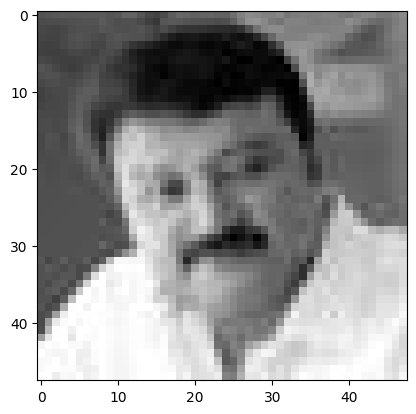

In [36]:
image = 'dataset3/Train/Jayaram(Student2)/flipped_Jayaram train 1 (1).jpg'
print("original image is of jayaram")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Mammotty
1/1 [==============================] - 0s 21ms/step
model prediction is  Mammotty(Student3)


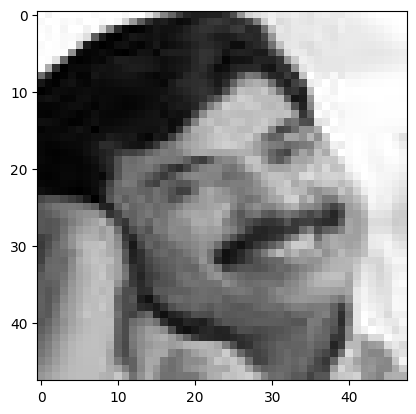

In [37]:
image = 'dataset3/Train/Mammotty(Student3)/flipped_Mammotty train 1 (15).jpg'
print("original image is of Mammotty")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Prithiviraj
1/1 [==============================] - 0s 21ms/step
model prediction is  Prithiraj(Student5)


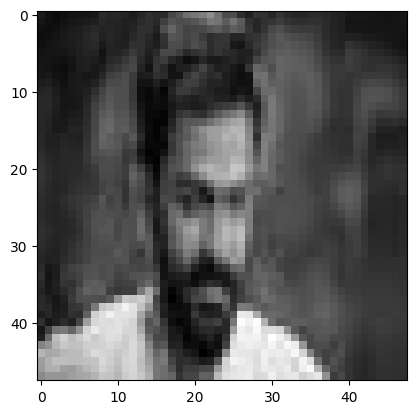

In [38]:
image = 'dataset3/Train/Prithiraj(Student5)/Prithiviraj train1 (32).jpg'
print("original image is of Prithiviraj")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of Mamootty
1/1 [==============================] - 0s 18ms/step
model prediction is  Mammotty(Student3)


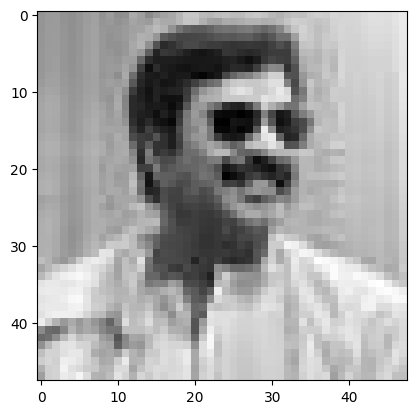

In [39]:
image = 'dataset3/Train/Mammotty(Student3)/flipped_Mammotty train 1 (17).jpg'
print("original image is of Mamootty")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')